In [1]:
#data 
import pandas as pd
#linear algebra
import numpy as np

#plotting
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split                   #split the data
from sklearn.preprocessing import StandardScaler                       #standar scalaer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #linear discriminant analysis
from sklearn.model_selection import GridSearchCV                       #best parameters
from sklearn.linear_model import LogisticRegression                    #logistic regression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC                                            #support vector machine
from sklearn.ensemble import RandomForestClassifier                    #random forest
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest                      #feature selection
from sklearn.feature_selection import f_classif
from sklearn.linear_model import Perceptron                            #perceptron
from sklearn.model_selection import KFold                              #cross validation
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import SGDClassifier

In [2]:
#load data
df = pd.read_csv("creditcard.csv")

In [3]:
#first five columns 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum().sum()

0

Seems like no data is missing

In [6]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
#save some memory
df['Class'] = df['Class'].astype('int8')

0 = No and 1 = Yes.

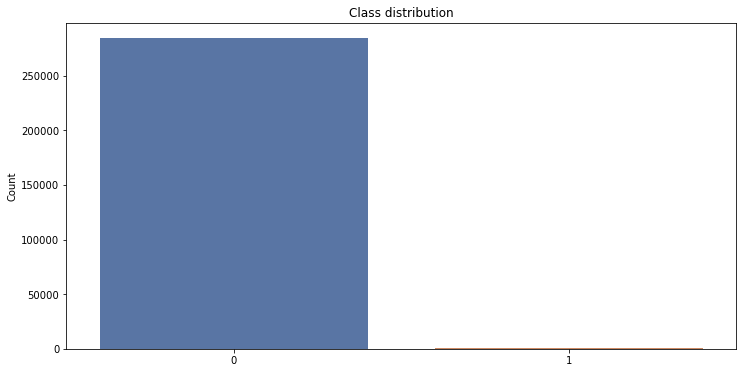

In [8]:
ax = sns.countplot(data = df, x = 'Class', palette = "deep")
ax.figure.set_size_inches(12,6)
ax.set(xlabel = "", ylabel= "Count", title = "Class distribution")

plt.show()

Data is skewed. Might have to do something later.

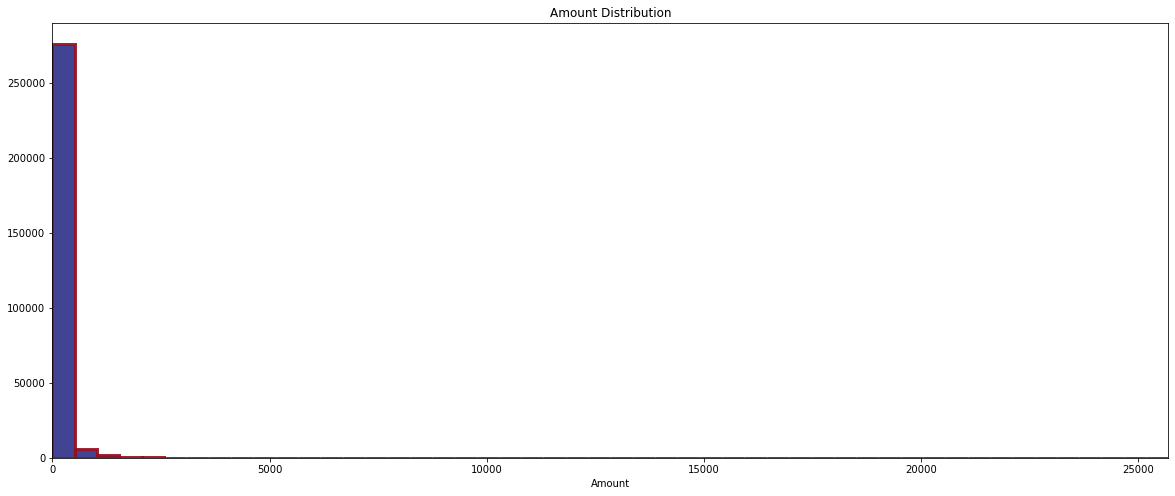

In [9]:
#histogram of Amount
ax = sns.distplot(a = df["Amount"], kde = False,                               #no kde
                  hist_kws = {"color":"#2d2f87", "edgecolor":"#960e1d",        #some color
                              "linewidth":3, "alpha":0.9, "linestyle":"-"})    
ax.set(title="Amount Distribution", xlabel = "Amount")
ax.figure.set_size_inches(20, 8)
ax.set_xlim(0, df["Amount"].max())


plt.show()

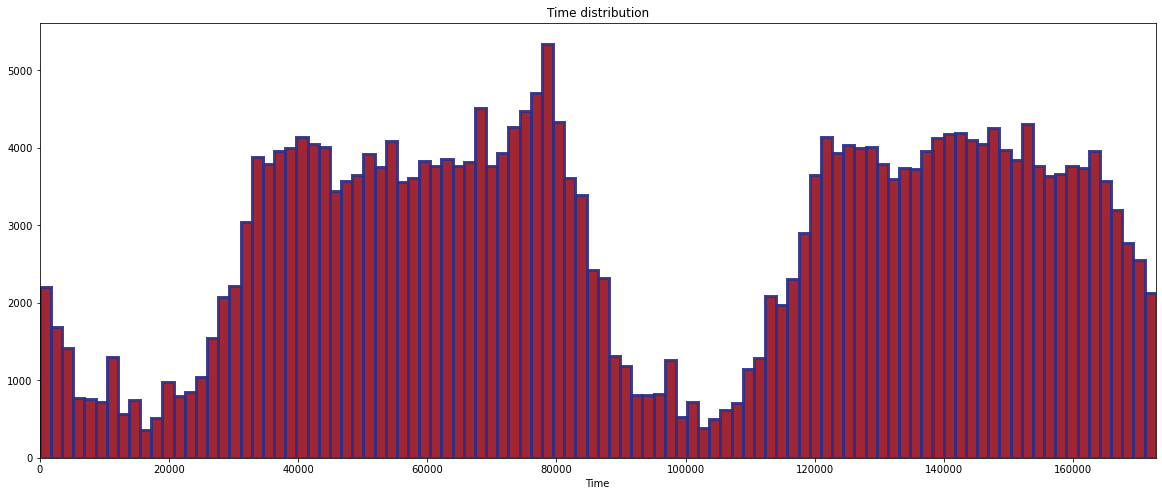

In [10]:
#same as before
ax = sns.distplot(a = df["Time"], kde = False, bins = 100,
                  hist_kws = {"color":"#960e1d", "edgecolor":"#2d2f87",        
                              "linewidth":3, "alpha":0.9, "linestyle":"-"})

ax.figure.set_size_inches(20, 8)
ax.set_xlim(0, df["Time"].max())
ax.set(title = "Time distribution")
plt.show()

Time data seems a little bit weird.

To train the data we should consider that the data is highly skewed, that means when sampling we need to get a good representation of what a fraud looks like

In [11]:
df.loc[:,"Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We're gonna try to undersample first

In [12]:
np.random.seed(0)
df_new = pd.concat([df.loc[df["Class"] == 0, :].sample(492), df[df["Class"] == 1]])

In [13]:
df_new.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

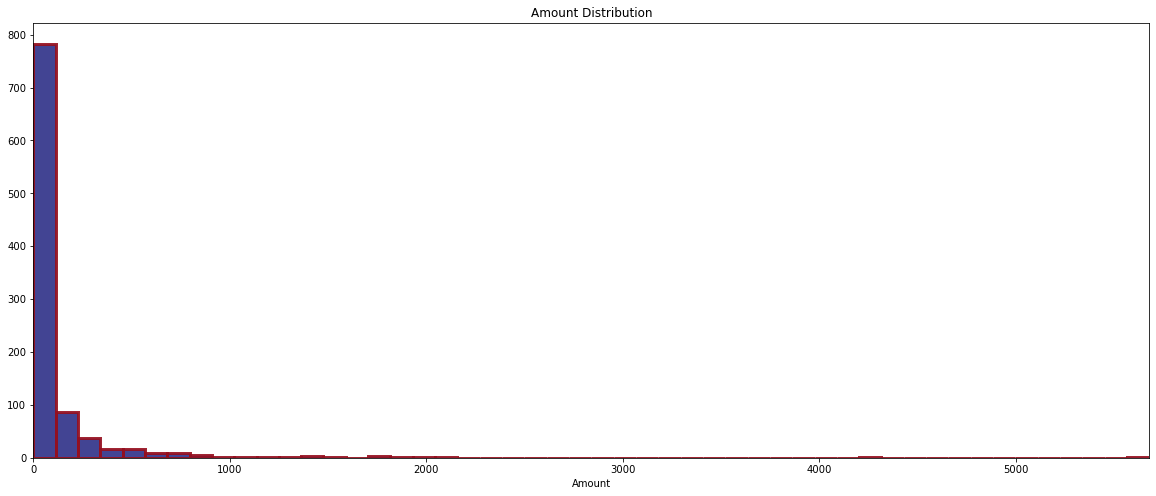

In [14]:
#histogram of Amount
ax = sns.distplot(a = df_new["Amount"], kde = False, bins = 50,                               
                  hist_kws = {"color":"#2d2f87", "edgecolor":"#960e1d",        
                              "linewidth":3, "alpha":0.9, "linestyle":"-"})    
ax.set(title="Amount Distribution", xlabel = "Amount")
ax.figure.set_size_inches(20, 8)
ax.set_xlim(0, df_new["Amount"].max())


plt.show()

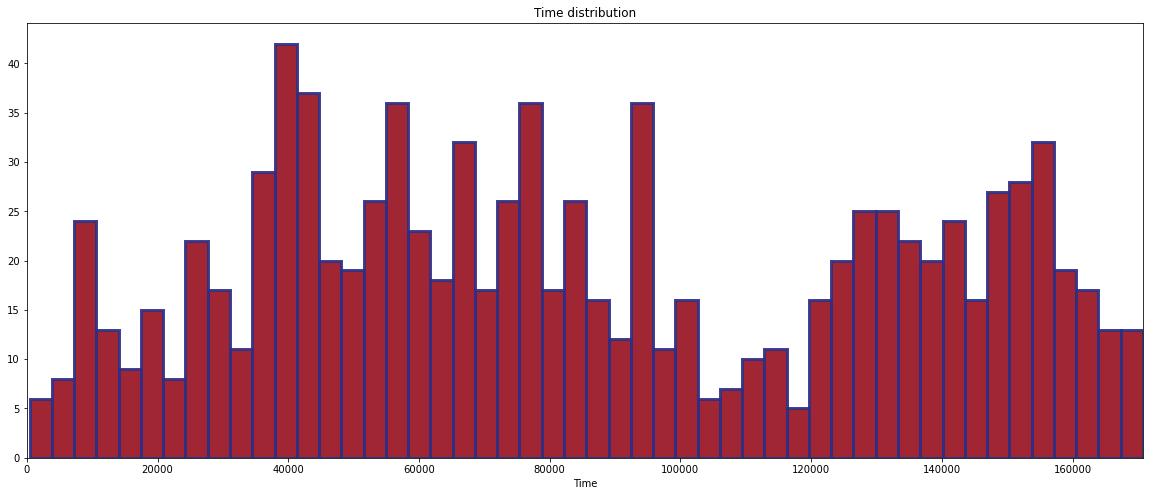

In [15]:
#histogram of time
ax = sns.distplot(a = df_new["Time"], kde = False, bins = 50,
                  hist_kws = {"color":"#960e1d", "edgecolor":"#2d2f87",        
                              "linewidth":3, "alpha":0.9, "linestyle":"-"})

ax.figure.set_size_inches(20, 8)
ax.set_xlim(0, df_new["Time"].max())
ax.set(title = "Time distribution")
plt.show()

These histograms look similar to the ones of the ones before but these look less extreme

## Classification problem

In [16]:
#predictor variables
X = df_new.drop(['Class'], axis = 1)

#target variable
y = df_new["Class"]

#split the dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

We only have numerical columns and we'll use the standard scaler on them

In [17]:
#make an instance of standard scaler
scaler = StandardScaler()

#fit the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We're going to make various models and then decide which one is the best

We begin with linear discriminant analysis

In [18]:
#pipeline of linear discriminant analysis
pipeline_lda = Pipeline([("selector", SelectKBest(f_classif)),
                         ("model", LinearDiscriminantAnalysis())])

#grid of parameters
param_grid_lda = [{"model__solver":["svd"], "model__tol":[0.000001, 0.00001, 0.0001],
                   "selector__k":[5, 10, 15, 20, 25, 30]},
                  {"model__solver":["lsqr", "eigen"], "model__shrinkage":[0, 0.25, 0.5, 0.75, 1], 
                   "model__tol":[0.000001, 0.00001, 0.0001], "selector__k":[5, 10, 15, 20, 25, 30]}]

#which combination of parameters is the best 
grid_search_lda = GridSearchCV(estimator = pipeline_lda,param_grid = param_grid_lda, cv = 5, 
                               scoring = "recall", return_train_score = True)

#fit the model
grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selector', SelectKBest()),
                                       ('model',
                                        LinearDiscriminantAnalysis())]),
             param_grid=[{'model__solver': ['svd'],
                          'model__tol': [1e-06, 1e-05, 0.0001],
                          'selector__k': [5, 10, 15, 20, 25, 30]},
                         {'model__shrinkage': [0, 0.25, 0.5, 0.75, 1],
                          'model__solver': ['lsqr', 'eigen'],
                          'model__tol': [1e-06, 1e-05, 0.0001],
                          'selector__k': [5, 10, 15, 20, 25, 30]}],
             return_train_score=True, scoring='recall')

In [19]:
#tuple of the best parameters and it's score
grid_search_lda.best_params_, grid_search_lda.best_score_

({'model__solver': 'svd', 'model__tol': 1e-06, 'selector__k': 30},
 0.8246575342465754)

Let's see the best parameters for other classifiers and compare them later. 

Now, some logistic regression

In [20]:
#instance of logistic regression
pipeline_lr = Pipeline([("selector", SelectKBest(f_classif)), ("model", LogisticRegression(verbose=0))])

#grid of parameters for logistic regression
param_grid_lr = [{"model__penalty":["l1", "l2"], "model__tol":[0.0000001, 0.000001, 0.00001, 0.0001],
                  "model__solver":["liblinear"], "model__max_iter":[100000], "selector__k":[5, 10, 15, 20, 25, 30]}]


grid_search_lr = GridSearchCV(estimator = pipeline_lr, param_grid = param_grid_lr, cv = 5, 
                              scoring = "recall", return_train_score = True)

#fit
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selector', SelectKBest()),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model__max_iter': [100000],
                          'model__penalty': ['l1', 'l2'],
                          'model__solver': ['liblinear'],
                          'model__tol': [1e-07, 1e-06, 1e-05, 0.0001],
                          'selector__k': [5, 10, 15, 20, 25, 30]}],
             return_train_score=True, scoring='recall')

In [21]:
#tuple of the best parameter and it's score
grid_search_lr.best_params_, grid_search_lr.best_score_

({'model__max_iter': 100000,
  'model__penalty': 'l1',
  'model__solver': 'liblinear',
  'model__tol': 1e-07,
  'selector__k': 5},
 0.9013698630136986)

Support Vector Machine

In [22]:
#instance of support vector machine
pipeline_svm = Pipeline([("selector", SelectKBest(f_classif)), ("model", SVC(random_state=0, max_iter=10000))])

#parameter grid for support vector machine
param_grid_svm = [{"model__kernel":["linear", "poly", "rbf"], "model__C":[ 1, 10, 100], 
                   "model__degree":[2, 3, 4], "selector__k":[5, 10, 15, 20, 25, 30]}]

grid_search_svm = GridSearchCV(estimator = pipeline_svm, param_grid = param_grid_svm, cv = 5,
                               scoring = "recall", return_train_score = True)

#fit
grid_search_svm.fit(X_train, y_train)

/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base

/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base

/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base

/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base

/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base

/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/lorenzoreyes/opt/anaconda3/envs/fraud_detection/lib/python3.8/site-packages/sklearn/svm/_base

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selector', SelectKBest()),
                                       ('model',
                                        SVC(max_iter=10000, random_state=0))]),
             param_grid=[{'model__C': [1, 10, 100], 'model__degree': [2, 3, 4],
                          'model__kernel': ['linear', 'poly', 'rbf'],
                          'selector__k': [5, 10, 15, 20, 25, 30]}],
             return_train_score=True, scoring='recall')

In [23]:
grid_search_svm.best_score_, grid_search_svm.best_params_

(0.9260273972602739,
 {'model__C': 100,
  'model__degree': 3,
  'model__kernel': 'poly',
  'selector__k': 25})

Random Forest

In [24]:
#instamce of a random forest classifier
pipeline_rf = Pipeline([("selector", SelectKBest(f_classif)), ("model", RandomForestClassifier(random_state = 0, bootstrap = True))])

#parameter grid for random forest
param_grid_rf = [{"model__n_estimators":[25, 50, 100], "model__criterion":["gini", "entropy"],  
                  "model__max_depth":[6, 8, 10, 12], "model__max_features":["sqrt", "log2"], 
                  "selector__k":[5, 10, 15, 20, 25, 30]}]     

grid_search_rf = GridSearchCV(estimator = pipeline_rf, param_grid = param_grid_rf, cv = 5, 
                              scoring = "recall", return_train_score=True)

#fit
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selector', SelectKBest()),
                                       ('model',
                                        RandomForestClassifier(random_state=0))]),
             param_grid=[{'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [6, 8, 10, 12],
                          'model__max_features': ['sqrt', 'log2'],
                          'model__n_estimators': [25, 50, 100],
                          'selector__k': [5, 10, 15, 20, 25, 30]}],
             return_train_score=True, scoring='recall')

In [25]:
grid_search_rf.best_estimator_, grid_search_rf.best_score_

(Pipeline(steps=[('selector', SelectKBest(k=5)),
                 ('model',
                  RandomForestClassifier(criterion='entropy', max_depth=12,
                                         max_features='sqrt', n_estimators=25,
                                         random_state=0))]),
 0.9095890410958903)

Perceptron

In [26]:
#pipeline of perceptron
pipeline_per = Pipeline([("selector", SelectKBest(f_classif)), ("model", Perceptron(random_state = 0))])

#parameter grid
param_grid_per = [{"model__penalty":["l2", "l1"], "model__alpha":[0.01, 0.001, 0.0001], 
                                "selector__k":[5, 10, 15, 20, 25, 30]}]


grid_search_per = GridSearchCV(estimator = pipeline_per, param_grid = param_grid_per, cv = 5,
                               scoring = "recall", return_train_score=True)
#fit
grid_search_per.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selector', SelectKBest()),
                                       ('model', Perceptron())]),
             param_grid=[{'model__alpha': [0.01, 0.001, 0.0001],
                          'model__penalty': ['l2', 'l1'],
                          'selector__k': [5, 10, 15, 20, 25, 30]}],
             return_train_score=True, scoring='recall')

In [27]:
grid_search_per.best_score_, grid_search_per.best_estimator_

(0.9397260273972602,
 Pipeline(steps=[('selector', SelectKBest(k=25)),
                 ('model', Perceptron(penalty='l1'))]))

Let's compare the best models with a little bit more carefully. Logistic Regression seemed to work best with 5 features, all the other models seem to work well with more features so i'll ignore this fact and i'll fit all the models with all the features.

In [50]:
#create list of models
models = []  

#append the models to the list
models.append(("Linear Discriminant Analysis", LinearDiscriminantAnalysis(solver = "svd", tol = 0.000001)))
models.append(("Logistic Regression", LogisticRegression(penalty = "l1", solver = "liblinear", tol = 0.0000001)))
models.append(("Support Vector Machine", SVC(C = 10, kernel = "poly", degree = 3, max_iter = 100000)))
models.append(("Random Forest", RandomForestClassifier(max_depth = 10,
                                            max_features = "log2", n_estimators = 25, random_state = 0)))
models.append(("Perceptron", Perceptron(random_state = 0, alpha = 0.001, penalty = "l1")))


results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "recall")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Linear Discriminant Analysis: 0.764623 (0.077539)
Logistic Regression: 0.634941 (0.090988)
Support Vector Machine: 0.762408 (0.050031)
Random Forest: 0.782073 (0.076573)
Perceptron: 0.731924 (0.183538)


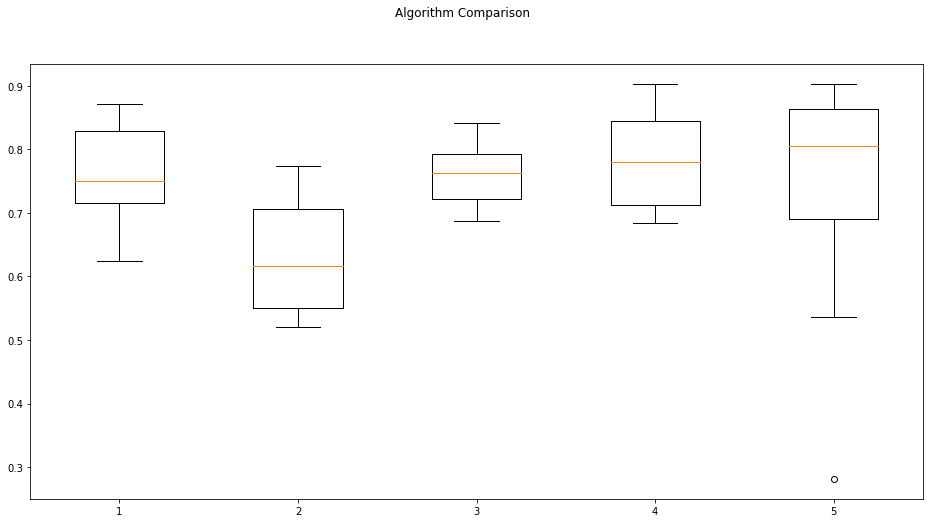

In [51]:
fig = plt.figure(figsize = (16, 8))
fig.suptitle("Algorithm Comparison")
plt.boxplot(results)

plt.show()

All the models seem to work quite well so it's a good idea to create a voting classifier with these models.

In [30]:
#voting classifier
voting = VotingClassifier(
                estimators = [("LDA", LinearDiscriminantAnalysis(solver = "svd", tol = 0.000001)),
                              ("LR", LogisticRegression(penalty = "l1", solver = "liblinear", tol = 0.0000001)),
                              ("SVM", SVC(C = 10, kernel = "poly", degree = 3, max_iter = 100000)), 
                              ("RF", RandomForestClassifier(max_depth = 10,
                                            max_features = "log2", n_estimators = 25, random_state = 0)),
                              ("Perceptron", Perceptron(random_state = 0, alpha = 0.001, penalty = "l1"))],
                voting = "hard")

#fit the model
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('LDA', LinearDiscriminantAnalysis(tol=1e-06)),
                             ('LR',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear',
                                                 tol=1e-07)),
                             ('SVM', SVC(C=10, kernel='poly', max_iter=100000)),
                             ('RF',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='log2',
                                                     n_estimators=25,
                                                     random_state=0)),
                             ('Perceptron',
                              Perceptron(alpha=0.001, penalty='l1'))])

In [52]:
#prediction for the training data
voting_predict = voting.predict(X_train)

#accuracy
recall_score(voting_predict, y_train), confusion_matrix(voting_predict, y_train)

(0.0018915025912047692,
 array([[ 18522,      0],
        [194714,    369]]))

Above 95% accuracy, that's quite good so we check on the test data

In [53]:
voting_predict_test = voting.predict(X_test)

recall_score(voting_predict_test, y_test)

0.0018868213962478333

The accuracy of the test set is quite bad compared to the training set, this means that downsampling is not the right method for this problem.

## Something different

Most of sklearn's classifiers algorithms have a class weight parameter so this is our new approach. First we stratify split the data into testing and training sets. And we use the class weight parameter when training the model.

In [33]:
#features
X = df.drop(["Class"], axis = 1)
#target
y = df["Class"]

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

In [34]:
#standard scaler
scaler = StandardScaler()

#scale the features
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We have a lot of data now and i don't wanna make my computer die, so i'll try less hyper parameters than before. We begin with SGDClassiffier for logistic regression and support vector machine.

In [35]:
#SGD
sgd = SGDClassifier(random_state = 0, class_weight = {0: 0.002, 1:0.998})

#parameter's grid
param_grid_sgd = [{"loss":["hinge"], "penalty":["l2"], "alpha":[0.1, 0.01, 0.001]},
                  {"loss":["log", "perceptron"], "penalty":["l2"], "alpha":[0.01, 0.001]}]

grid_search_sgd = GridSearchCV(estimator = sgd, param_grid = param_grid_sgd, cv = 10,
                               scoring = "accuracy", return_train_score = True)

#fit
grid_search_sgd.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=SGDClassifier(class_weight={0: 0.002, 1: 0.998},
                                     random_state=0),
             param_grid=[{'alpha': [0.1, 0.01, 0.001], 'loss': ['hinge'],
                          'penalty': ['l2']},
                         {'alpha': [0.01, 0.001], 'loss': ['log', 'perceptron'],
                          'penalty': ['l2']}],
             return_train_score=True, scoring='accuracy')

In [36]:
grid_search_sgd.best_score_, grid_search_sgd.best_params_

(0.9992743634177377, {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'})

In [37]:
pizza = SGDClassifier(random_state = 0, class_weight = {0:0.001, 1:0.999}, 
                      loss = "hinge", penalty = "l2", alpha = 0.01)

pizza.fit(X_train, y_train)
train_error = pizza.predict(X_train)
test_error = pizza.predict(X_test)

accuracy_score(train_error, y_train), accuracy_score(test_error, y_test)

(0.9798225696964022, 0.9800005617819724)

In [38]:
confusion_matrix(test_error, y_test), confusion_matrix(train_error, y_train)

(array([[69669,    14],
        [ 1410,   109]]),
 array([[208962,     36],
        [  4274,    333]]))

In [39]:
recall_score(test_error, y_test), recall_score(train_error, y_train)

(0.07175773535220539, 0.0722813110484046)

In [40]:
precision_score(test_error, y_test), precision_score(train_error, y_train)

(0.8861788617886179, 0.9024390243902439)

In [41]:
#SGD
sgd = SGDClassifier(random_state = 0, shuffle = True)

#parameter's grid
param_grid_sgd = [{"loss":["hinge"], "penalty":["l2"], "alpha":[0.01, 0.001]}]

grid_search_sgd = GridSearchCV(estimator = sgd, param_grid = param_grid_sgd, cv = 10,
                               scoring = "recall", return_train_score = True)

#fit
grid_search_sgd.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(random_state=0),
             param_grid=[{'alpha': [0.01, 0.001], 'loss': ['hinge'],
                          'penalty': ['l2']}],
             return_train_score=True, scoring='recall')

In [42]:
grid_search_sgd.best_score_, grid_search_sgd.best_params_

(0.4608108108108109, {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'})

In [43]:
pizza = SGDClassifier(random_state = 0, shuffle = True, loss = "hinge", penalty = "l2", alpha = 0.001)

pizza.fit(X_train, y_train)

train_error = pizza.predict(X_train)
test_error = pizza.predict(X_test)

accuracy_score(train_error, y_train), accuracy_score(test_error, y_test)

(0.9989606984855224, 0.9987921687593045)

In [44]:
confusion_matrix(test_error, y_test), confusion_matrix(train_error, y_train)

(array([[71065,    72],
        [   14,    51]]),
 array([[213211,    197],
        [    25,    172]]))

In [45]:
recall_score(test_error, y_test), recall_score(train_error, y_train)

(0.7846153846153846, 0.8730964467005076)

In [46]:
precision_score(test_error, y_test), precision_score(train_error, y_train)

(0.4146341463414634, 0.46612466124661245)